In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import theano
import scipy.stats as stats
import scipy
import seaborn as sns
import pickle
sns.set(color_codes=True)

from bayesian import CLRM, Result

In [2]:
# Set logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('bayesian_glm')

plt.style.use('fivethirtyeight')
%matplotlib inline

files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

In [ ]:
results_linear = []
for f in files:
    clrm = CLRM(f, lambda w, x: 1/w*np.abs(x))
    clrm.fit_linear_model(10000)
    results_linear.append(clrm)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_1.csv
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi_map...
INFO:pymc3:Initializing NUTS using advi_map...


Optimization terminated successfully.
         Current function value: 297.473455
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19


Average ELBO = -299.5: 100%|██████████| 200000/200000 [00:24<00:00, 8009.04it/s]
Finished [100%]: Average ELBO = -299.49
INFO:pymc3:Finished [100%]: Average ELBO = -299.49
100%|██████████| 10000/10000 [00:15<00:00, 655.56it/s]
INFO:CLRM:Time taken = 53.3276309967
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_2.csv
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi_map...
INFO:pymc3:Initializing NUTS using advi_map...


Optimization terminated successfully.
         Current function value: 391.462838
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21


Average ELBO = -393.05: 100%|██████████| 200000/200000 [00:22<00:00, 8863.44it/s]
Finished [100%]: Average ELBO = -393.04
INFO:pymc3:Finished [100%]: Average ELBO = -393.04
  8%|▊         | 848/10000 [00:03<00:22, 403.36it/s]

In [ ]:
results_constant = []
for f in files:
    clrm = CLRM(f, lambda w, x: w)
    clrm.fit_linear_model(10000)
    results_constant.append(clrm)

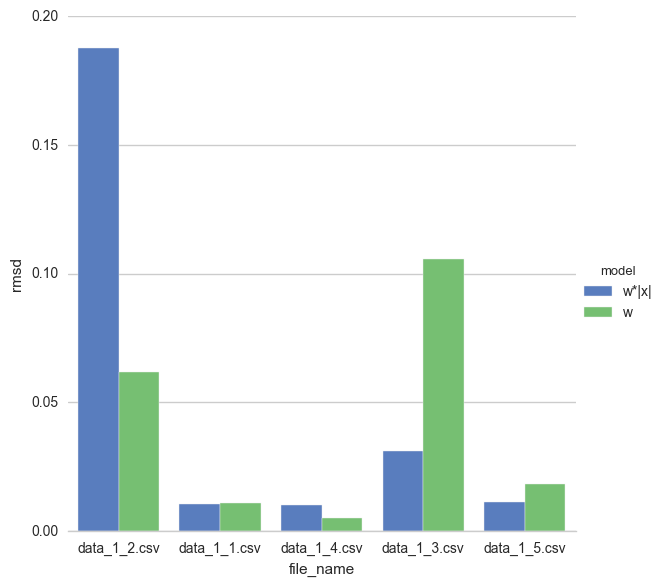

In [38]:
results_stats = {'w*|x|': {}, 'w': {}}

for item in results_w:
    results_stats['w*|x|'][item.file_name] = {'rmsd': item.rmsd()}
    
for item in results_homo:
    results_stats['w'][item.file_name] = {'rmsd': item.rmsd()}    
    
metrics = []
for k, v in results_stats.items():
    for f, stat in v.items():
            metrics.append({'model': k, 'file_name': f, 'rmsd': stat['rmsd']})    
            
df = pd.DataFrame(metrics)

import seaborn as sns
sns.set(style="whitegrid")


# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="file_name", y="rmsd", hue="model", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("rmsd")            

In [39]:
(((0.1875+0.0106)*100)+(50*(0.009+0.0311+0.0112)))/(350)

0.06392857142857143

In [33]:
df

,file_name,model,rmsd
0,data_1_2.csv,w*|x|,0.187564
1,data_1_1.csv,w*|x|,0.010629
2,data_1_4.csv,w*|x|,0.009982
3,data_1_3.csv,w*|x|,0.031137
4,data_1_5.csv,w*|x|,0.011203
5,data_1_2.csv,w,0.061943
6,data_1_1.csv,w,0.010907
7,data_1_4.csv,w,0.005060
8,data_1_3.csv,w,0.105794
9,data_1_5.csv,w,0.018112


In [40]:
(((0.01+0.06)*100)+(50*(0.005+0.1057+0.0181)))/(350)

0.0384